In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# Define image size and directories
IMAGE_SIZE = [224, 224]  # VGG19 uses 224x224 input size
train_directory = r"C:\Users\adrie\OneDrive\Desktop\img.class\melon_dataset\train"
test_directory = r"C:\Users\adrie\OneDrive\Desktop\img.class\melon_dataset\test"
val_directory = r"C:\Users\adrie\OneDrive\Desktop\img.class\melon_dataset\val"

In [3]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load training and testing sets with data augmentation
training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 1615 images belonging to 10 classes.
Found 550 images belonging to 10 classes.


In [6]:
# Add preprocessing layer to the front of VGG19
vgg19 = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [7]:
# Freeze the layers
for layer in vgg19.layers:
    layer.trainable = False

# Global Average Pooling
x = GlobalAveragePooling2D()(vgg19.output)

# Fully Connected Layer
x = Dense(128, activation='relu')(x)

# Output Layer
output_tensor = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=vgg19.input, outputs=output_tensor)

In [8]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [9]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10


51/51 [==============================] - 220s 4s/step - loss: 1.9530 - accuracy: 0.3585 - val_loss: 1.7175 - val_accuracy: 0.4273
Epoch 2/10
51/51 [==============================] - 232s 5s/step - loss: 1.4864 - accuracy: 0.5653 - val_loss: 1.4009 - val_accuracy: 0.5545
Epoch 3/10
51/51 [==============================] - 233s 5s/step - loss: 1.2425 - accuracy: 0.6489 - val_loss: 1.2335 - val_accuracy: 0.6291
Epoch 4/10
51/51 [==============================] - 253s 5s/step - loss: 1.0804 - accuracy: 0.6867 - val_loss: 1.0612 - val_accuracy: 0.7109
Epoch 5/10
51/51 [==============================] - 228s 4s/step - loss: 0.9804 - accuracy: 0.7121 - val_loss: 0.9980 - val_accuracy: 0.6818
Epoch 6/10
51/51 [==============================] - 241s 5s/step - loss: 0.8859 - accuracy: 0.7282 - val_loss: 0.8653 - val_accuracy: 0.7327
Epoch 7/10
51/51 [==============================] - 232s 5s/step - loss: 0.8069 - accuracy: 0.7647 - val_loss: 0.8108 - val_accuracy: 0.7636
Epoch 8/10


In [10]:
# Save the model
model.save('melon_species_vgg19.h5')

import matplotlib.pyplot as plt

C:\Users\adrie\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


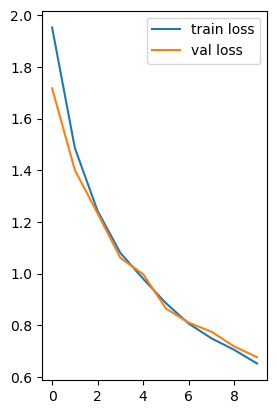

In [11]:
# Plot loss and accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

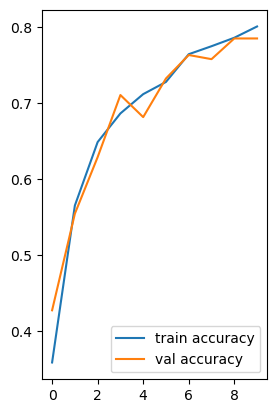

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()